In [167]:
%matplotlib nbagg
%load_ext autoreload
%autoreload 2
import os
import sys
import pickle

import nltk
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

chatbot_path = "/home/bi0max/projects/tutorials/chatbot"
if chatbot_path not in sys.path:
    sys.path.append(chatbot_path)

from chatbot.config import *
from chatbot.embed import *
from chatbot import embed

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
# read file with all words from dataset
path = os.path.join(DATA_DIR, "all_words.pickle")
all_words = pickle.load(open(path, "rb"))

In [3]:
# calculate occurences of each word
freq_dist = nltk.FreqDist(all_words)

In [4]:
freq_dist

FreqDist({'.': 7980297, 'the': 4372951, ',': 4101380, 'i': 3945805, 'a': 2893895, 'to': 2703894, 'newlinechar': 2622413, 'it': 2522508, 'you': 2135333, 'and': 2015833, ...})

<IPython.core.display.Javascript object>


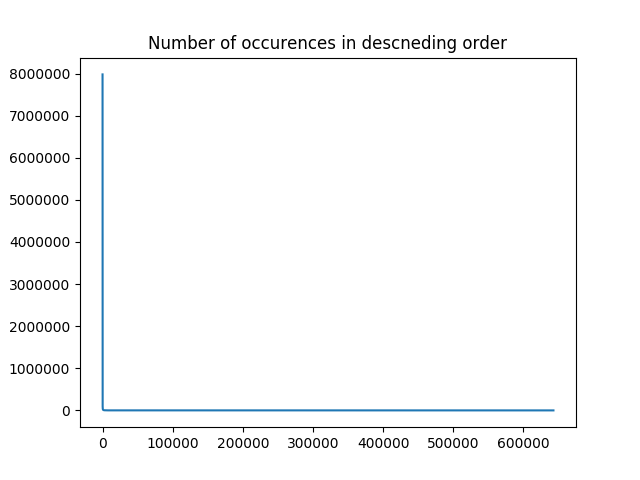

Text(0.5,1,'Number of occurences in descneding order')

In [5]:
freq_list = list(freq_dist.values())
freq_list.sort(reverse=True)
plt.plot(freq_list)
plt.title("Number of occurences in descneding order")

In [6]:
n_unique_words = freq_dist.B()
print(f"Number unique words: {n_unique_words}")

Number unique words: 642842


In [33]:
# Overall words (not unique) in the dataset 
# If we take certain threshold of most common words, which percentage of the overall amount they will cover
freq_array = np.array(freq_list)
overall_occurences = freq_array.sum()
print(f"Overall occurences: {overall_occurences}")
thresholds = [5000, 10000, 12000, 15000, 20000]#, 50000, 100000]
for threshold in thresholds:
    top_words_occurences = freq_array[:threshold].sum()
    percent_covered = top_words_occurences / overall_occurences
    print(f"With threshold {threshold} percent covered: {percent_covered}")

Overall occurences: 135166738
With threshold 5000 percent covered: 0.9098231548652155
With threshold 10000 percent covered: 0.9433925452872881
With threshold 12000 percent covered: 0.950524506998164
With threshold 15000 percent covered: 0.9583649788160161
With threshold 20000 percent covered: 0.9670202812765963


In [15]:
# read GLOVE file
glove_word2index, glove_index2word, word2vec_map = embed.read_glove_vecs(GLOVE_MODEL)

In [23]:
# Find out which words from the dataset are present in GLOVE
in_glove = np.zeros(thresholds[-1])
glove_words = list(glove_word2index.keys())
top_words = [wf[0] for wf in freq_dist.most_common(thresholds[-1])]
for i, word in enumerate(top_words):
    if i % 100 == 0:
        print(f"{i} Done.")
    if word in glove_words:
        in_glove[i] = 1
    

0 Done.
100 Done.
200 Done.
300 Done.
400 Done.
500 Done.
600 Done.
700 Done.
800 Done.
900 Done.
1000 Done.
1100 Done.
1200 Done.
1300 Done.
1400 Done.
1500 Done.
1600 Done.
1700 Done.
1800 Done.
1900 Done.
2000 Done.
2100 Done.
2200 Done.
2300 Done.
2400 Done.
2500 Done.
2600 Done.
2700 Done.
2800 Done.
2900 Done.
3000 Done.
3100 Done.
3200 Done.
3300 Done.
3400 Done.
3500 Done.
3600 Done.
3700 Done.
3800 Done.
3900 Done.
4000 Done.
4100 Done.
4200 Done.
4300 Done.
4400 Done.
4500 Done.
4600 Done.
4700 Done.
4800 Done.
4900 Done.
5000 Done.
5100 Done.
5200 Done.
5300 Done.
5400 Done.
5500 Done.
5600 Done.
5700 Done.
5800 Done.
5900 Done.
6000 Done.
6100 Done.
6200 Done.
6300 Done.
6400 Done.
6500 Done.
6600 Done.
6700 Done.
6800 Done.
6900 Done.
7000 Done.
7100 Done.
7200 Done.
7300 Done.
7400 Done.
7500 Done.
7600 Done.
7700 Done.
7800 Done.
7900 Done.
8000 Done.
8100 Done.
8200 Done.
8300 Done.
8400 Done.
8500 Done.
8600 Done.
8700 Done.
8800 Done.
8900 Done.
9000 Done.
9100 Done.


In [37]:
for threshold in thresholds:
    n_words_in_glove = in_glove[:threshold].sum()
    print(f"For threshold {threshold} {threshold - n_words_in_glove} words are not in GLOVE.")

For threshold 5000 45.0 words are not in GLOVE.
For threshold 10000 133.0 words are not in GLOVE.
For threshold 12000 204.0 words are not in GLOVE.
For threshold 15000 335.0 words are not in GLOVE.
For threshold 20000 659.0 words are not in GLOVE.


In [40]:
print("Top words, which are not in GLOVE:")
np.array(top_words)[:5000][~in_glove.astype(bool)[:5000]]

Top words, which are not in GLOVE:


array(['newlinechar', 'subreddit', '..', 'downvoted', 'upvote', 'hahaha',
       'lmao', 'idk', 'ftfy', 'downvote', 'tbh', 'downvotes', 'nsfw',
       'upvotes', 'upvoted', 'imgur', '3232', 'ayy', 'redditor', 'skyrim',
       'redditors', 'rekt', 'circlejerk', 'ok.', 'subreddits', 'damnit',
       'downvoting', 'shits', 'hahahaha', 'shitlord', 'gamergate', '.i',
       'nbsp', 'o.o', 'afaik', 'hahah', 'crota', 'shitting', 'inb4',
       'imho', 'vape', 'butthurt', 'amirite', 'dumbass', 'tf2'],
      dtype='<U17')

### We will use 12000 most common words, since they cover approx. 95% of all words.